In [120]:
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.io import imsave
from scipy.io import savemat
import tifffile
import zarr
import glob
import pathlib
import pandas as pd
import numpy as np
from matplotlib import rcParams
rcParams['figure.dpi']=200

In [3]:
SAMPLE = 'TNP_pilot_cycif'
# SAMPLE = 'PilotTonsil_5_z08' # This is the codex sample, folder was renamed to match the actual files coming out from the mcmicro run. 

DATA_DIR = f'data/{SAMPLE}' 

In [65]:
images = [pathlib.Path(x) for x in sorted(glob.glob(f"{DATA_DIR}/*/*tif") + glob.glob(f"{DATA_DIR}/*/*/*tif")) if "subset" not in x]
images

[PosixPath('data/TNP_pilot_cycif/probability-maps/TNP_pilot_cycif_Probabilities_0.tif'),
 PosixPath('data/TNP_pilot_cycif/registration/TNP_pilot_cycif.ome.tif'),
 PosixPath('data/TNP_pilot_cycif/segmentation/unmicst-TNP_pilot_cycif/cellMask.tif'),
 PosixPath('data/TNP_pilot_cycif/segmentation/unmicst-TNP_pilot_cycif/cellRingMask.tif'),
 PosixPath('data/TNP_pilot_cycif/segmentation/unmicst-TNP_pilot_cycif/cytoMask.tif'),
 PosixPath('data/TNP_pilot_cycif/segmentation/unmicst-TNP_pilot_cycif/cytoRingMask.tif'),
 PosixPath('data/TNP_pilot_cycif/segmentation/unmicst-TNP_pilot_cycif/nucleiMask.tif'),
 PosixPath('data/TNP_pilot_cycif/segmentation/unmicst-TNP_pilot_cycif/nucleiRingMask.tif')]

## ome-tiff

In [56]:
img = zarr.open(tifffile.TiffFile(images[1], mode="rb").aszarr(series=0), mode="r")
# plt.imshow(img[0,...])

## The full sample is too big, get a subset
Different ranges for CyCIF and CODEX

In [57]:
# ### CYCIF
# # 200 * 200
x_min = 15400
x_max = x_min+200
y_min = 8750
y_max = y_min+200


### CODEX
# 1000 * 1000
# x_min = 500
# x_max = x_min+1000
# y_min = 6000
# y_max = y_min+1000

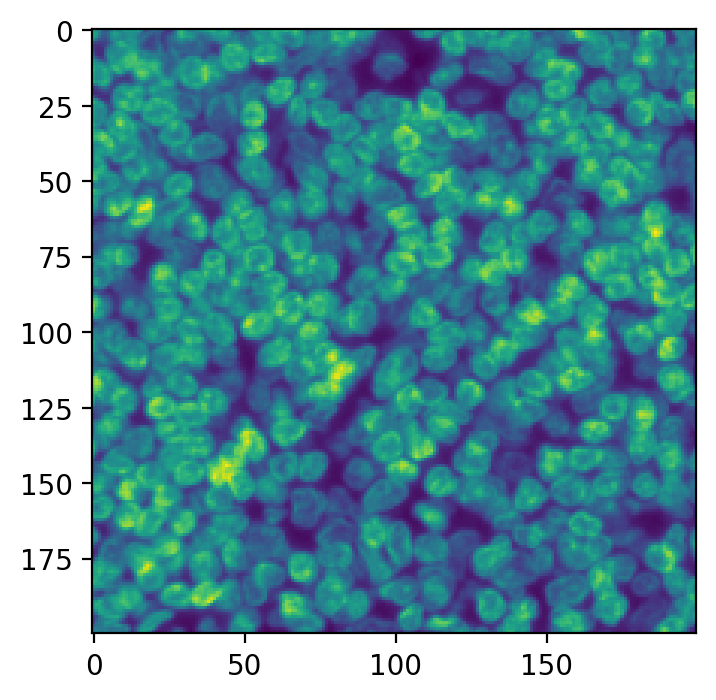

In [58]:
plt.imshow(img[0, x_min:x_max, y_min:y_max])

## Marker files
The markers.csv is messing the header. Similar file for CyCIF data has been fixed but not this one.

In [107]:
markers = pd.read_csv(f'{DATA_DIR}/markers.csv').iloc[:,0]
markers

0           Hoechst1
1               A488
2               A555
3               A647
4           Hoechst2
5     anti_NaKATPase
6           anti_CD3
7        anti_CD45RO
8           Hoechst3
9           Ki67_488
10       Keratin_570
11          aSMA_660
12          Hoechst4
13          CD8a_488
14           CD4_570
15          CD45_647
16          Hoechst5
17          CD20_488
18         CD11c_555
19           PD1_647
20          Hoechst6
21          CD68_488
22         FOXP3_570
23          PDL1_647
24          Hoechst7
25         CD163_488
26             H3_PE
27          CD31_647
28          Hoechst8
29          Ecad_488
30      Vimentin_555
31       Catenin_647
32          Hoechst9
33       LaminAC_488
34           pH3_555
35          H2ax_647
Name: marker_name, dtype: object

## Quantification

In [122]:
quant = pd.read_csv(glob.glob(f"{DATA_DIR}/quantification/*.csv")[0])

In [123]:
quant

CellID  A488_cellMask  A555_cellMask  A647_cellMask  \
0              1   15630.638889     752.838889     289.400000   
1              2   13037.169960    1436.312253     522.118577   
2              3    9126.455939    1294.459770     471.712644   
3              4   16722.963964    1758.156156     617.915916   
4              5   15137.184834    1772.407583     587.345972   
...          ...            ...            ...            ...   
2067686  2067687   18358.738281    3388.234375     854.589844   
2067687  2067688   16201.355102    3440.775510     687.759184   
2067688  2067689    9088.466102    3027.877119     639.906780   
2067689  2067690   16401.789286    2971.482143     662.410714   
2067690  2067691    8493.564356    3257.920792     720.519802   

         Hoechst2_cellMask  anti_NaKATPase_cellMask  anti_CD3_cellMask  \
0               495.391667              9488.152778        1079.650000   
1               807.276680              6455.185771        1273.849802   
2               644.413793              5237.750958        1253.053640   
3               745.090090              8483.297297        1415.588589   
4               766.170616              7608.881517        1356.957346   
...                    ...                      ...                ...   
2067686        1877.578125             18905.605469        2626.613281   
2067687        2309.032653             18259.853061        2642.991837   
2067688        2001.461864             10198.834746        2315.834746   
2067689        1961.539286             15566.403571        2313.800000   
2067690        2140.138614              9408.856436        2465.752475   

         anti_CD45RO_cellMask  Hoechst3_cellMask  Ki67_488_cellMask  ...  \
0                  510.208333         499.741667        6593.180556  ...   
1                  548.106719         491.739130        5910.636364  ...   
2                  551.260536         477.582375        4614.509579  ...   
3                  604.519520         470.645646        8049.318318  ...   
4                  588.701422         461.601896        7204.246445  ...   
...                       ...                ...                ...  ...   
2067686            861.277344        1239.964844        7274.339844  ...   
2067687            888.493878        1623.706122        7035.346939  ...   
2067688            863.338983        1634.046610        4240.978814  ...   
2067689            872.046429        1799.303571        5924.667857  ...   
2067690            941.717822        1623.737624        4041.574257  ...   

           Y_centroid  column_centroid  row_centroid  Area  MajorAxisLength  \
0         1789.152778     18550.066667   1789.152778   360        22.666699   
1         1802.545455     17228.003953   1802.545455   253        25.197323   
2         1805.126437     17141.574713   1805.126437   261        22.235611   
3         1807.132132     17258.204204   1807.132132   333        26.538935   
4         1807.710900     17296.028436   1807.710900   211        17.467840   
...               ...              ...           ...   ...              ...   
2067686  27207.257812      9807.101562  27207.257812   256        23.933765   
2067687  27208.991837      9764.583673  27208.991837   245        20.398866   
2067688  27211.605932      9663.550847  27211.605932   236        22.141449   
2067689  27218.285714      9629.957143  27218.285714   280        24.070436   
2067690  27219.717822      9689.648515  27219.717822   202        19.114723   

         MinorAxisLength  Eccentricity  Solidity    Extent  Orientation  
0              20.272548      0.447316  0.967742  0.782609    -1.429873  
1              13.188297      0.852087  0.916667  0.674667     1.421886  
2              14.993956      0.738438  0.956044  0.790909     1.535515  
3              16.095425      0.795096  0.959654  0.800481     1.528659  
4              15.468305      0.464581  0.959091  0.694079    -1.567036  
...                  ...          

## Save ome-tiff subset 

In [101]:
ims_selected = {}
imgs = {}
for img_path in images:
    img_ = zarr.open(tifffile.TiffFile(img_path, mode="rb").aszarr(series=0), mode="r")
    imgs[img_path] = img_
    print(img_.shape)
    if len(img_.shape) == 2:
        im_selected = img_[x_min:x_max, y_min:y_max]
    else:
        im_selected = img_[:, x_min:x_max, y_min:y_max]
    ims_selected[img_path] = im_selected
    patch_name = pathlib.Path(DATA_DIR) / f"{img_path.stem}_subset{img_path.suffix}"
    tifffile.imsave(patch_name, im_selected)

(3, 27299, 20045)
(36, 27299, 20045)
(27299, 20045)
(27299, 20045)
(27299, 20045)
(27299, 20045)
(27299, 20045)
(27299, 20045)


In [124]:
im1 = imread(patch_name)
im1.shape

(200, 200)

## Save quantification subset

In [131]:
cell_mask_path = [x for x in images if "cellMask" in str(x)][0]

In [141]:
quant_subset = quant[np.in1d(quant["CellID"], ims_selected[cell_mask_path])]

In [142]:
quant_subset

CellID  A488_cellMask  A555_cellMask  A647_cellMask  \
977570    977571   16437.287500    2002.387500     468.025000   
977860    977861   12908.951220    1949.268293     460.414634   
978115    978116   16638.311475    1991.737705     436.950820   
978116    978117   12844.273438    1920.757812     479.210938   
978117    978118   12064.264706    1808.044118     439.529412   
...          ...            ...            ...            ...   
1005074  1005075   12562.041176    1752.294118     432.864706   
1005224  1005225   13167.291971    1907.051095     451.503650   
1005498  1005499   15712.158879    1854.700935     443.934579   
1005620  1005621   10645.793388    1842.636364     450.157025   
1005739  1005740   16601.446154    1774.600000     430.815385   

         Hoechst2_cellMask  anti_NaKATPase_cellMask  anti_CD3_cellMask  \
977570         1061.050000             24273.662500        5739.937500   
977860         1002.609756             19749.304878        5504.853659   
978115         1060.524590             23054.680328        4132.508197   
978116          984.937500             19420.125000        5070.234375   
978117          983.985294             18414.191176        3593.764706   
...                    ...                      ...                ...   
1005074        1005.447059             20528.470588        3984.770588   
1005224        1004.795620             18234.890511        5249.270073   
1005498         988.719626             22286.373832        4349.710280   
1005620        1048.239669             16670.421488        4439.000000   
1005739         940.000000             26819.123077        3071.415385   

         anti_CD45RO_cellMask  Hoechst3_cellMask  Ki67_488_cellMask  ...  \
977570            9349.500000        7767.562500       22419.162500  ...   
977860            7064.731707       10671.695122       17699.865854  ...   
978115            8341.385246        4816.434426       22623.549180  ...   
978116            7495.898438        7580.179688       17229.820312  ...   
978117            9870.308824        7637.529412       15941.426471  ...   
...                       ...                ...                ...  ...   
1005074           6502.464706       12762.323529       16897.829412  ...   
1005224           7823.824818       16739.715328       18091.218978  ...   
1005498           9000.046729       13822.495327       22195.214953  ...   
1005620           4981.264463       17862.347107       14462.975207  ...   
1005739           3817.984615        9171.307692       24417.969231  ...   

           Y_centroid  column_centroid  row_centroid  Area  MajorAxisLength  \
977570   15393.350000      8843.525000  15393.350000    80        13.492970   
977860   15394.817073      8851.621951  15394.817073    82        12.347951   
978115   15398.385246      8744.680328  15398.385246   122        19.397730   
978116   15399.218750      8859.804688  15399.218750   128        15.982573   
978117   15395.705882      8932.367647  15395.705882    68        12.324925   
...               ...              ...           ...   ...              ...   
1005074  15600.652941      8867.994118  15600.652941   170        16.376277   
1005224  15600.167883      8890.664234  15600.167883   137        15.085174   
1005498  15603.813084      8881.242991  15603.813084   107        16.184264   
1005620  15604.107438      8919.760331  15604.107438   121        15.422122   
1005739  15602.215385      8801.046154  15602.215385    65        15.021215   

         MinorAxisLength  Eccentricity  Solidity    Extent  Orientation  
977570          8.670049      0.766235  0.833333  0.634921     0.123431  
977860          9.139761      0.672404  0.921348  0.683333    -0.429123  
978115          8.181168      0.906708  0.917293  0.512605     1.051683  
978116         10.573853      0.749869  0.920863  0.568889    -0.682969  
978117          7.425480      0.798137  0.918919  0.581197    -1.361328  
...                  ...          

In [149]:
quant_subset.to_csv(f"{DATA_DIR}_quantification.csv")

## Save matlab matrices

The matlab code expects channels in the last dimension. Moving the axis

In [152]:
matlab_dict = {
    img_path.stem.replace(".", "_"): np.moveaxis(im_selected, 0, -1) if len(im_selected.shape) == 3 else im_selected for img_path, im_selected in ims_selected.items()
}
matlab_dict["channels"] = markers.to_list()
matlab_dict["data"] = quant_subset.to_dict("list")

In [153]:
savemat(
    pathlib.Path(DATA_DIR) / "subsets.mat",
    matlab_dict
)

## Visualize all channels of each image

In [86]:
all_ch = {}
for img_path, im in ims_selected.items():
    if len(im.shape) == 2:
        all_ch[(img_path, None)] = im
    else:
        for i in range(im.shape[0]):
            all_ch[(img_path, i)] = im[i, ...]

In [91]:
len(all_ch)

45

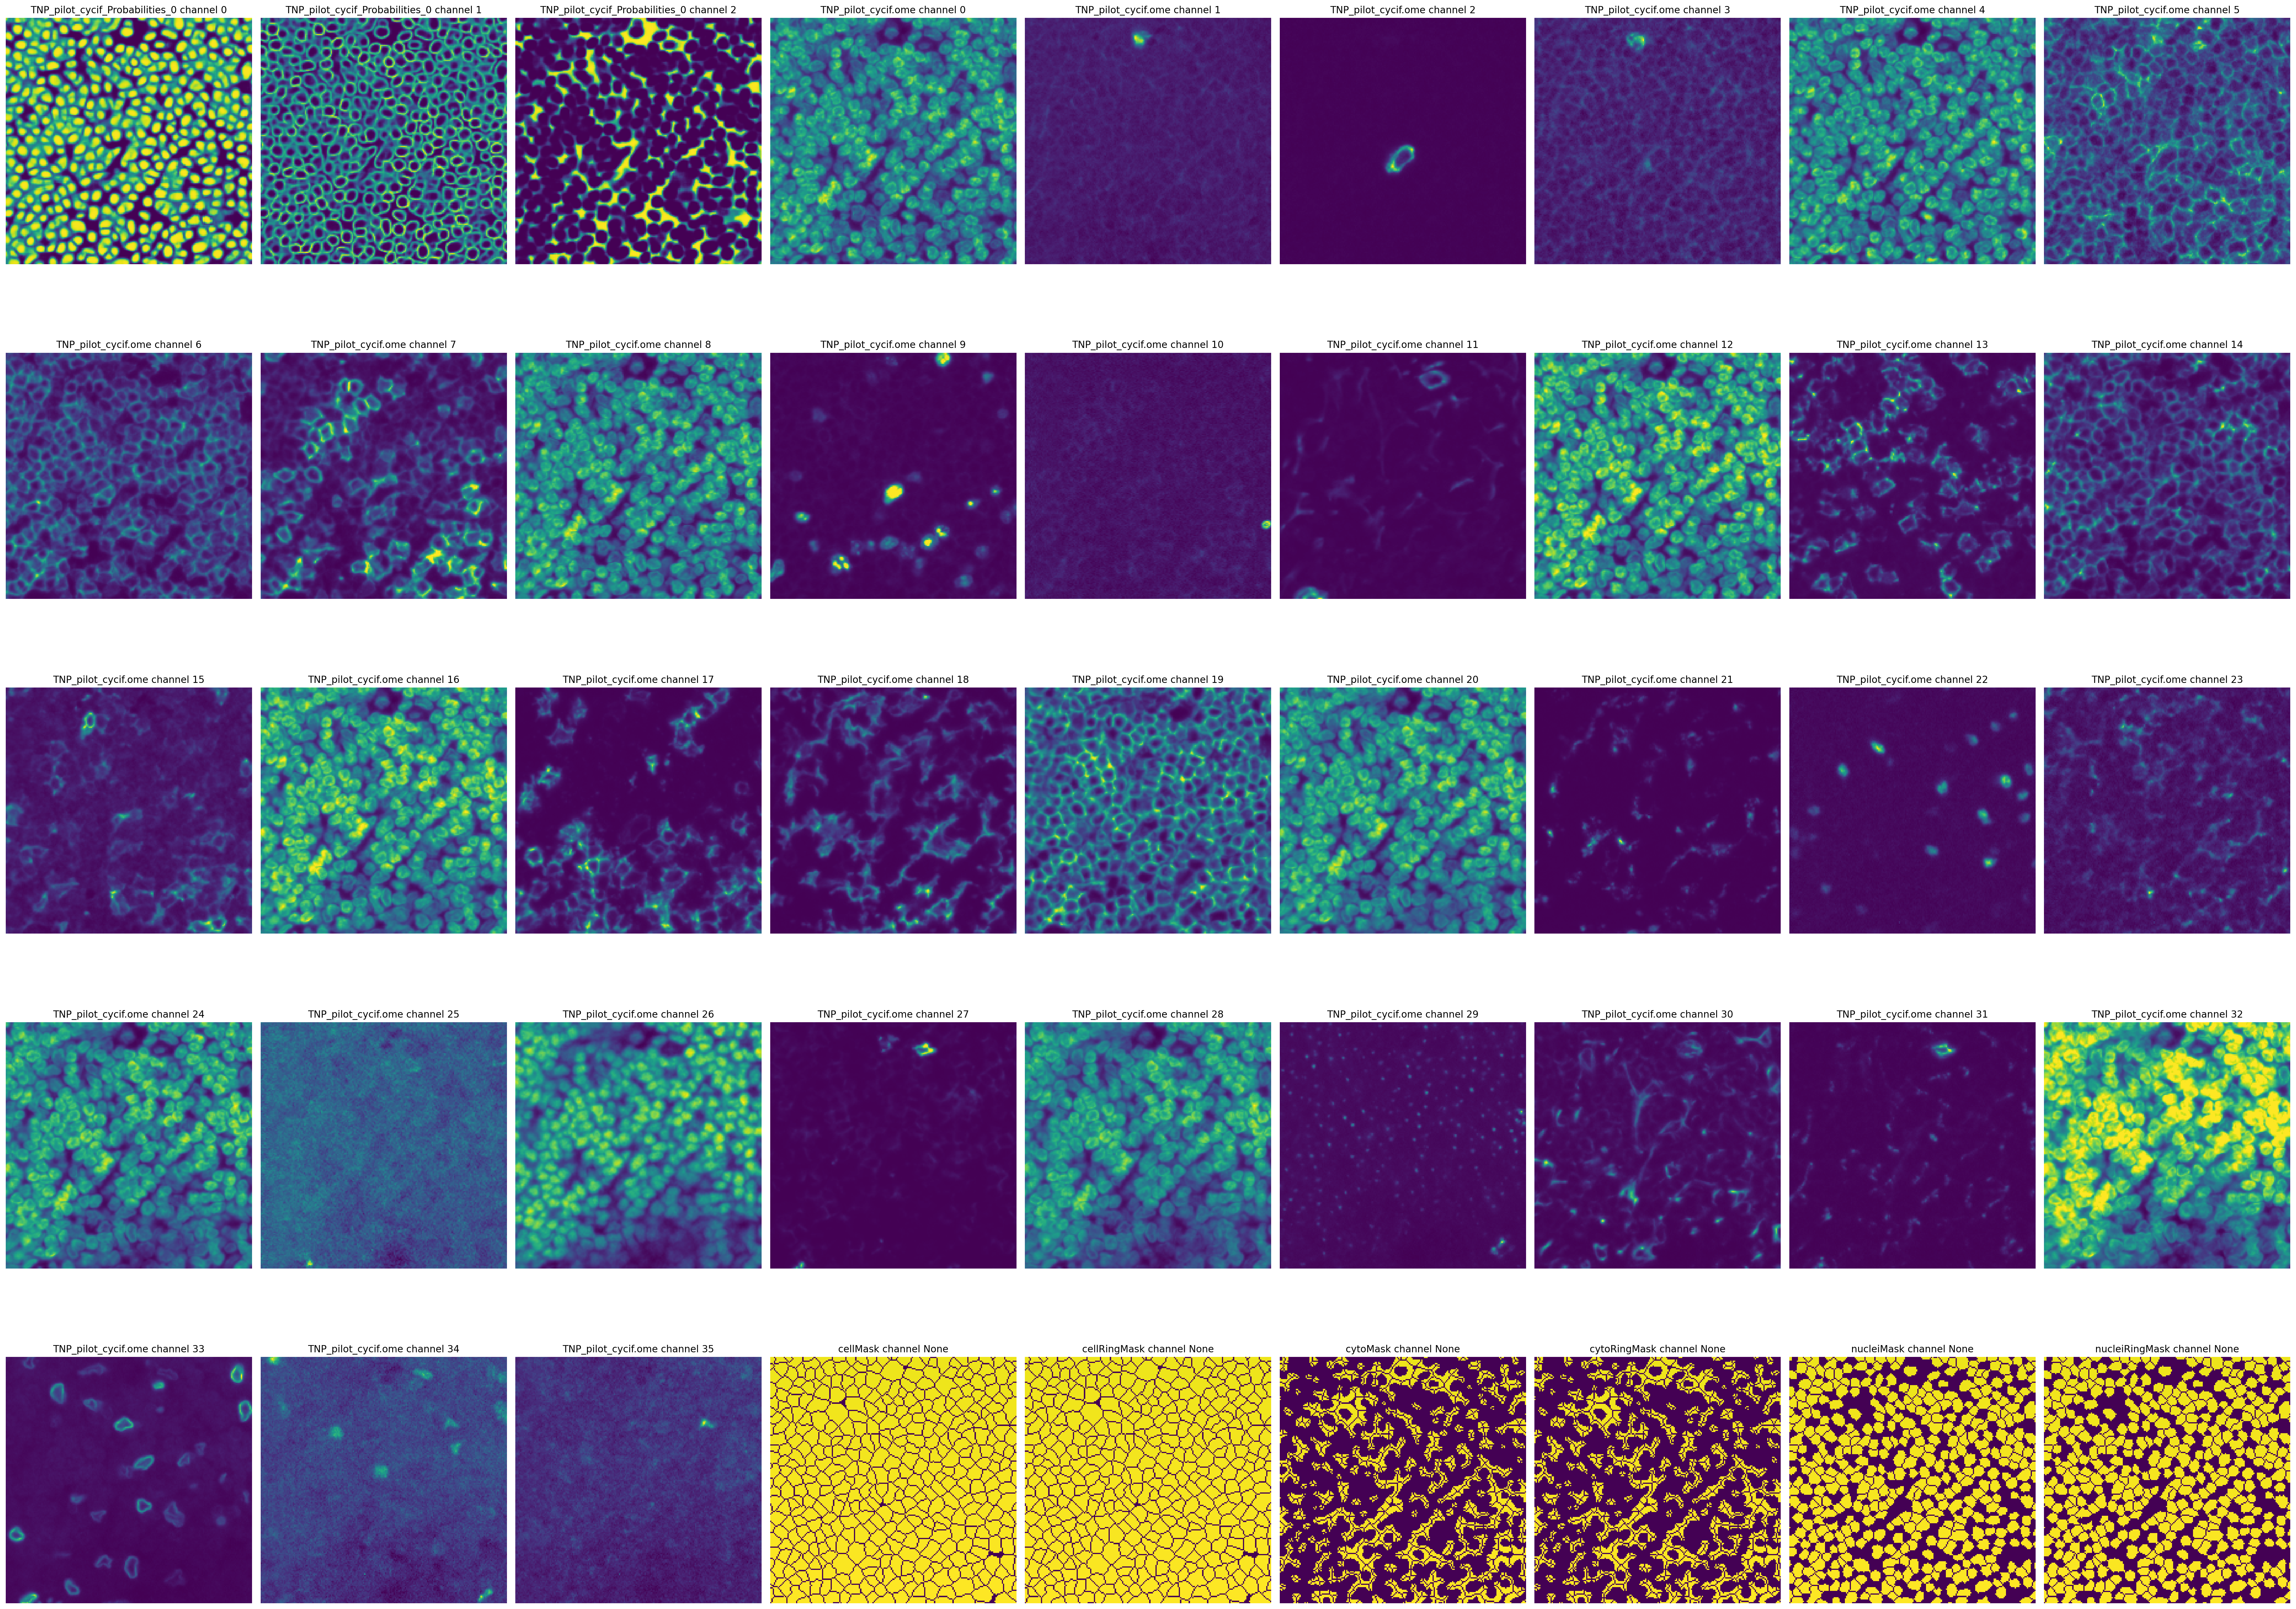

In [118]:
fig = plt.figure(figsize=(40, 30))

for i, ((img_path, ch), im_selected) in enumerate(all_ch.items()):
    ax = plt.subplot(5, len(all_ch) // 5, i + 1)
    ax.axis("off")
    ax.imshow(im_selected)
    ax.set_title(f"{img_path.stem} channel {ch}")
plt.tight_layout()

In [119]:
fig.savefig(DATA_DIR + "/cycif_subset.jpg")